<a href="https://colab.research.google.com/github/PepoAmbriz/SDTRC-trazado-y-graficos/blob/main/SDTRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de trazado de rayos cósmicos 
La escala de longitud irá en función de R.
Supongamos un círculo de radio R=1/4 in, escribiré R=1 para simplificar el cálculo, sabiendo que las longitudes van con un factor de 0.25 in.

In [1]:
#Librerias necesarias
 
#Lectura de datos
import pandas as pd
#Para arreglos
import numpy as np
from numpy import linalg as la
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [2]:
#Función para obtener vectores L en el intervalo
def L_array(R,L,pasos,limits,Centros,index):
  k=0
  X0=[]
  X=[]
  Li=[]
  for i in range(pasos):
    theta=(i)*(2*np.pi/(pasos))                    #El ángulo de paso, de 0 a pi
    xo=[(R*np.cos(theta))+Centros[index][0], (R*np.sin(theta))+Centros[index][1],0]   #Coordenadas x y 
    error=1
    while (error > 0.01):
      theta2=theta+(k*(2*np.pi/pasos))
      xi=[((R*np.cos(theta2))+Centros[index][0]), ((R*np.sin(theta2))+Centros[index][1]),0]                                            #asignamos un x_k
      li=[xi[0]-xo[0],xi[1]-xo[1],0]                     #Calculamos li
      norma=la.norm(li)                                        #Calculamos la norma
      error=abs(norma-L)         
      k=k+1

    #m=abs((li[1])/(li[0]))
    #print(m)
    #if( m > limits[1]):               #Vemos que m esté en limites
    #if(la.norm(li)<=L):
    X0.append(xo)
    X.append(xi)
    Li.append(li)
      #print(m,li)

    
  return X0, X, Li


In [3]:
#Implementamos parametrización de los centros de cada circunferencia.
w,v=0,0
Centros=[[2.0+w,3.5+v,0],                 #La circunferencia 0 del arreglo es la superior en el dispositivo
         [3.0+w,1.75+v,0],                 #Luego bajamos de derecha a izquierda
         [1.0+w,1.75+v,0],
         [4.0+w,0.0+v,0],
         [2.0+w,0.0+v,0],
         [0.0+w,0.0+v,0]]



In [4]:
#Vamos a probar datos para un tubo
R=1
L1=1.54
L2=1.45
#L1=2
#L2=2
limits=[-1,1] #límites de pendientes dados por vetos
pasos=100  #Puntos aleatoríos en la circunferencia, separar 360 grados en 100, nos dá errores de 3.6 grados


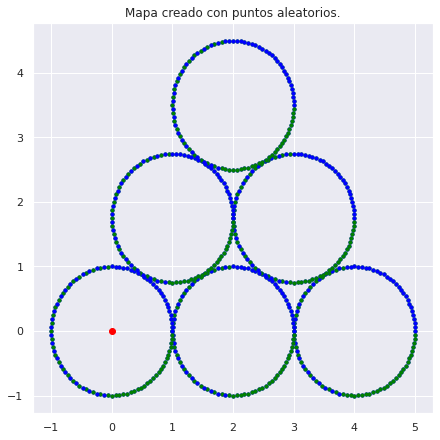

In [5]:
#Calculemos todos los arreglos para cada tubo.

T1X0, T1X, T1 =L_array(R,L1,pasos,limits,Centros,0)
T2X0, T2X, T2 =L_array(R,L2,pasos,limits,Centros,1)
T3X0, T3X, T3 =L_array(R,L2,pasos,limits,Centros,2)
T4X0, T4X, T4 =L_array(R,L1,pasos,limits,Centros,3)
T5X0, T5X, T5 =L_array(R,L2,pasos,limits,Centros,4)
T6X0, T6X, T6 =L_array(R,L2,pasos,limits,Centros,5)

#Graficamos para comprobar que el cálculo de los puntos es correcto
fig2, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
for i in range(len(T1X)):

  plt.scatter(T1X[i][0],T1X[i][1],color='blue',s=10)
  plt.scatter(T1X0[i][0],T1X0[i][1],color='green',s=10)
  plt.scatter(T2X[i][0],T2X[i][1],color='blue',s=10)
  plt.scatter(T2X0[i][0],T2X0[i][1],color='green',s=10)
  plt.scatter(T3X[i][0],T3X[i][1],color='blue',s=10)
  plt.scatter(T3X0[i][0],T3X0[i][1],color='green',s=10)
  plt.scatter(T4X[i][0],T4X[i][1],color='blue',s=10)
  plt.scatter(T4X0[i][0],T4X0[i][1],color='green',s=10)
  plt.scatter(T5X[i][0],T5X[i][1],color='blue',s=10)
  plt.scatter(T5X0[i][0],T5X0[i][1],color='green',s=10)
  plt.scatter(T6X[i][0],T6X[i][1],color='blue',s=10)
  plt.scatter(T6X0[i][0],T6X0[i][1],color='green',s=10)
plt.title("Mapa creado con puntos aleatorios.")
plt.scatter(w,v,color='red')
#OJO, con algun R puede no converger.
#print(T1X)
#plt.ylim(-1,1)
plt.show()

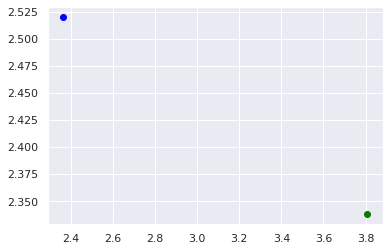

In [6]:
#Aquí únicamente se prueba que se obtenga un vector con norma L_x
plt.scatter(T2X[10][0],T2X[10][1],color="blue")
plt.scatter(T2X0[10][0],T2X0[10][1],color="green")
plt.show()

In [7]:
#Comparamos ambos arreglos 
def trazado(T1,T1X,T1X0,T2,T2X,T2X0,tol,dx,dy):
  T1index=[]
  T2index=[]
  for i in range(len(T1)):
    for j in range(len(T2)):
      if(T1[i][0]!=0 and T1[i][1]!=0 ):
        if(T2[i][0]!=0 and T2[i][1]!=0):
          difX=abs( (T1X[i][0]) - (T2X0[j][0]) )
          difY=abs( (T1X[i][1]) - (T2X0[j][1]) )
        
          if(difX <= dx and difY <= dy):
            
            dot= T1[i][0]*T2[j][0] + T1[i][1]*T2[j][1]
            err=abs( np.arccos( dot/(L1*L2) )  )
            
            if((err*180.0)/np.pi <= tol ):
              print(err*180/np.pi)
              T1index.append(i)
              T2index.append(j)             #Estoy guardando los indices por pares en los arreglos para corresponder puntos


  figure, axes = plt.subplots(1,2, figsize=(10,5.1),constrained_layout=True)
  #Graficamos el dispositivo en el plano xy
  x=np.linspace(0,10,1000)
  for i in range(6):
    draw_circle = plt.Circle(Centros[i], R,fill=False,color='black')
    axes[0].set_aspect(1)
    axes[0].add_artist(draw_circle)



  ma=[]
  Tra=[]

  for i in range(len(T2index)):
    axes[0].scatter(T1X[T1index[i]][0],T1X[T1index[i]][1],color="blue")
    axes[0].scatter(T1X0[T1index[i]][0],T1X0[T1index[i]][1],color="green")
    axes[0].scatter(T2X[T2index[i]][0],T2X[T2index[i]][1],color="purple")
    axes[0].scatter(T2X0[T2index[i]][0],T2X0[T2index[i]][1],color="black")
    s= (T1[T1index[i]][1] / T1[T1index[i]][0] + T2[T2index[i]][1] / T2[T2index[i]][0] )/2  #La pendiente promedio
    Tra.append([[T1X0[T1index[i]][0],T1X[T1index[i]][0],T2X0[T2index[i]][0],T2X[T2index[i]][0]],
                [T1X0[T1index[i]][1],T1X[T1index[i]][1],T2X0[T2index[i]][1],T2X[T2index[i]][1] ]])
    
    a=np.arctan(s)*180/np.pi
    if (a>0):
      ma.append([s,a])
    if (a<0):
      ma.append([s,a+180])


    axes[0].plot(Tra[i][0],Tra[i][1],'-')



  for i in range(len(ma)):
    axes[1].scatter(ma[i][0],ma[i][1],color='red')

  axes[0].set_ylim(-1.1,5.1)
  axes[0].set_xlim(-1.1,5.1)

  axes[1].set_ylim(0,180)
  axes[0].set_ylabel('Y (1/4 in)')
  axes[0].set_xlabel('X (1/4 in)')

  figure.suptitle('Posibles trayectorias y ángulos promedio de incidencia.')

  plt.ylabel("Ángulo en grados")
  plt.xlabel("Pendiente")
  plt.show()

3.4282940183008725
3.428294018296511
3.428294018306617
3.4282940183010853


<ipython-input-7-a3547c0a570b>:15: RuntimeWarning: invalid value encountered in arccos
  err=abs( np.arccos( dot/(L1*L2) )  )


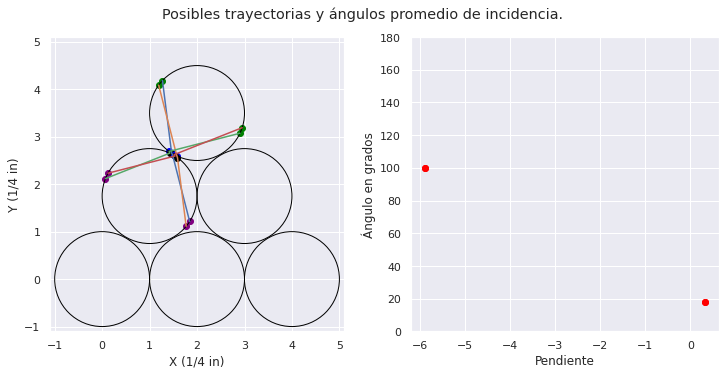

In [8]:
#Corremos la función
tol=3.6 #por el error de los pasos
#Supongamos un pequeño error de separación de los puntos en un area dx x dy 
dx=0.1
dy=0.1

trazado(T1,T1X,T1X0,T3,T3X,T3X0,tol,dx,dy)


# Gráficos de la amplitud promedio y frecuencias de valores para cada canal

In [9]:
#ARREGLOS DE AMPLITUDES PROMEDIO CON DESVIACIÓN ESTANDAR PARA CADA VALOR.
Ch5=np.array([[1560, 1660, 1760, 1860],
              [112.7722772,	112.970297,	122.8712871,	135.6435644],
              [11.84219675,	11.62278404,	20.510321,	28.68504285]])
Ch4=np.array([[1560, 1660, 1760, 1860],
              [102.6732673,	105.6435644,	111.0891089,	113.7623762],
              [13.99221849,	14.86040656,	19.02109303,	27.74352123]])
Ch6=np.array([[1560,1660,1760],
              [104.7524752,	109.5049505,	115.049505],
              [15.00626932,	13.29482889,	25.04491016]])
Ch2=np.array([[1560,1660,1760,1860],
              [169.4059406,	146.3366337,	169.5049505,	164.950495],
              [32.18141644,	26.02778409,	45.72474686,	77.80261901]])

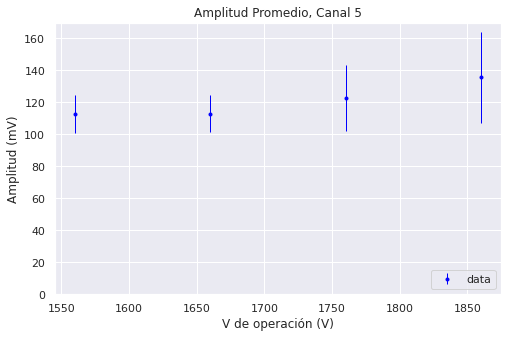

In [10]:
figure, axes = plt.subplots(figsize=(8,5))
plt.errorbar(Ch5[0],Ch5[1],yerr=Ch5[2]/1,fmt='.',elinewidth=1,color='blue',label='data')
plt.title('Amplitud Promedio, Canal 5')
plt.legend(loc='lower right')
plt.ylabel('Amplitud (mV)')
plt.xlabel('V de operación (V)')
plt.ylim(0,170)
plt.grid(1)
plt.show()

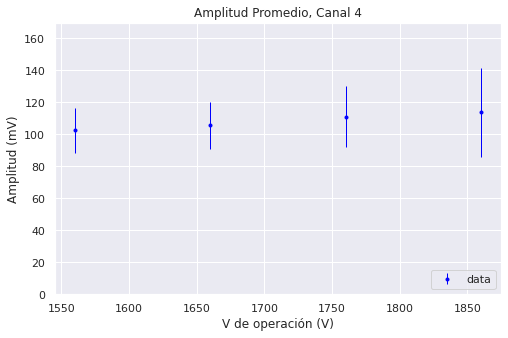

In [11]:
figure, axes = plt.subplots(figsize=(8,5))
plt.errorbar(Ch4[0],Ch4[1],yerr=Ch4[2]/1,fmt='.',elinewidth=1,color='blue',label='data')
plt.title('Amplitud Promedio, Canal 4')
plt.legend(loc='lower right')
plt.ylabel('Amplitud (mV)')
plt.xlabel('V de operación (V)')
plt.ylim(0,170)
plt.grid(1)
plt.show()

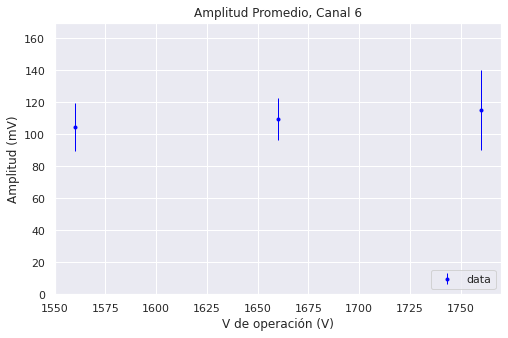

In [12]:
figure, axes = plt.subplots(figsize=(8,5))
plt.errorbar(Ch6[0],Ch6[1],yerr=Ch6[2]/1,fmt='.',elinewidth=1,color='blue',label='data')
plt.title('Amplitud Promedio, Canal 6')
plt.legend(loc='lower right')
plt.ylabel('Amplitud (mV)')
plt.xlabel('V de operación (V)')
plt.ylim(0,170)
plt.grid(1)
plt.show()

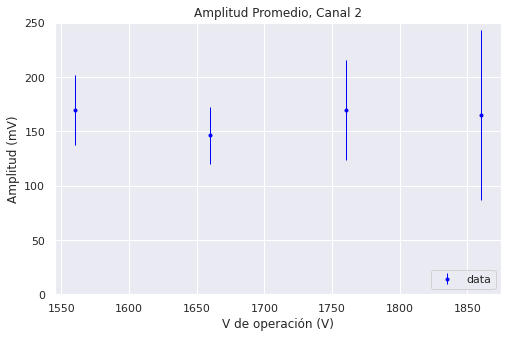

In [13]:
figure, axes = plt.subplots(figsize=(8,5))
plt.errorbar(Ch2[0],Ch2[1],yerr=Ch2[2]/1,fmt='.',elinewidth=1,color='blue',label='data')
plt.title('Amplitud Promedio, Canal 2')
plt.legend(loc='lower right')
plt.ylabel('Amplitud (mV)')
plt.xlabel('V de operación (V)')
plt.ylim(0,250)
plt.grid(1)
plt.show()

In [14]:
data5=np.loadtxt("/content/drive/MyDrive/Colab-Notebooks/SDTRC/dataCh5.txt",usecols=(0,1,2,3),skiprows=1,).T #0->1560, 1->1660, 2->1760, 3->1860
data4=np.loadtxt("/content/drive/MyDrive/Colab-Notebooks/SDTRC/dataCh4.txt",usecols=(0,1,2,3),skiprows=1,).T #0->1560, 1->1660, 2->1760, 3->1860
data2=np.loadtxt("/content/drive/MyDrive/Colab-Notebooks/SDTRC/dataCh2.txt",usecols=(0,1,2,3),skiprows=1,).T #0->1560, 1->1660, 2->1760, 3->1860
data6=np.loadtxt("/content/drive/MyDrive/Colab-Notebooks/SDTRC/dataCh6.txt",usecols=(0,1,2),skiprows=1,).T #0->1560, 1->1660, 2->1760, 3->1860

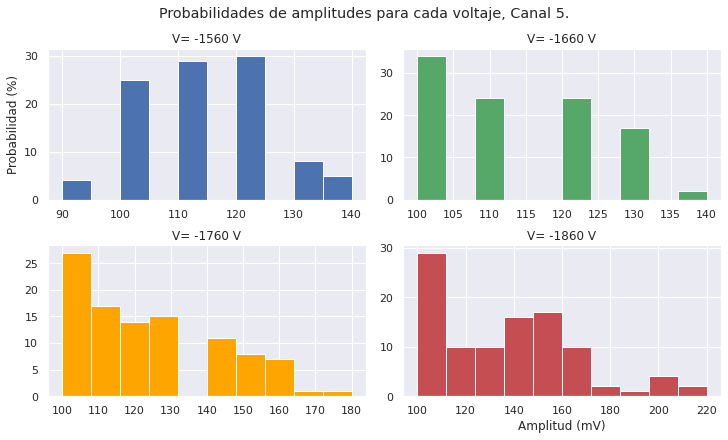

In [15]:
figure, axes = plt.subplots(2,2, figsize=(10,6),constrained_layout=True)

axes[0,0].hist(data5[0], 10, density=False, facecolor='b')
axes[0,0].set_ylabel('Probabilidad (%)')
axes[0,0].set_title('V= -1560 V')

axes[0,1].hist(data5[1], 10, density=False, facecolor='g')
axes[0,1].set_title('V= -1660 V')

axes[1,0].hist(data5[2], 10, density=False, facecolor='orange')
axes[1,0].set_title('V= -1760 V')

axes[1,1].hist(data5[3], 10, density=False, facecolor='r')
axes[1,1].set_title('V= -1860 V')

figure.suptitle('Probabilidades de amplitudes para cada voltaje, Canal 5.')
plt.xlabel('Amplitud (mV)')

plt.grid(1)
plt.show()

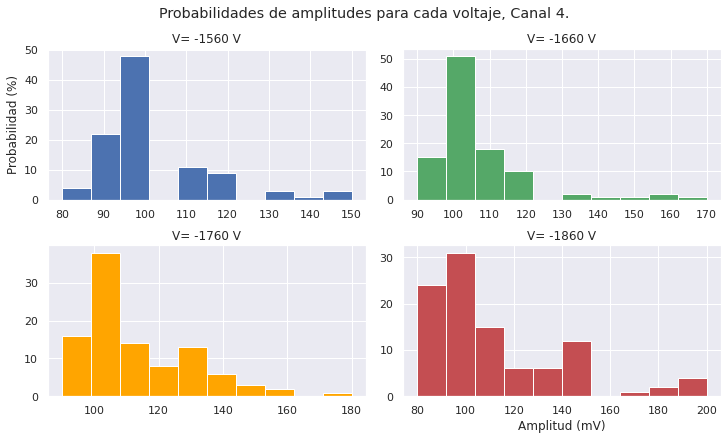

In [16]:
figure, axes = plt.subplots(2,2, figsize=(10,6),constrained_layout=True)

axes[0,0].hist(data4[0], 10, density=False, facecolor='b')
axes[0,0].set_ylabel('Probabilidad (%)')
axes[0,0].set_title('V= -1560 V')

axes[0,1].hist(data4[1], 10, density=False, facecolor='g')
axes[0,1].set_title('V= -1660 V')

axes[1,0].hist(data4[2], 10, density=False, facecolor='orange')
axes[1,0].set_title('V= -1760 V')

axes[1,1].hist(data4[3], 10, density=False, facecolor='r')
axes[1,1].set_title('V= -1860 V')

figure.suptitle('Probabilidades de amplitudes para cada voltaje, Canal 4.')
plt.xlabel('Amplitud (mV)')

plt.grid(1)
plt.show()

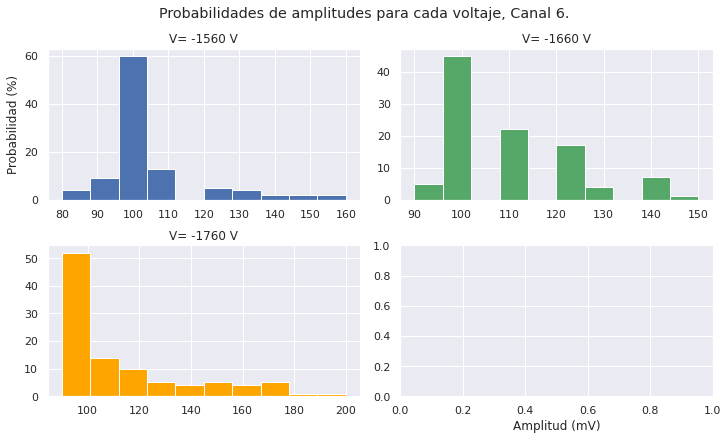

In [17]:
figure, axes = plt.subplots(2,2, figsize=(10,6),constrained_layout=True)

axes[0,0].hist(data6[0], 10, density=False, facecolor='b')
axes[0,0].set_ylabel('Probabilidad (%)')
axes[0,0].set_title('V= -1560 V')

axes[0,1].hist(data6[1], 10, density=False, facecolor='g')
axes[0,1].set_title('V= -1660 V')

axes[1,0].hist(data6[2], 10, density=False, facecolor='orange')
axes[1,0].set_title('V= -1760 V')



figure.suptitle('Probabilidades de amplitudes para cada voltaje, Canal 6.')
plt.xlabel('Amplitud (mV)')

plt.grid(1)
plt.show()

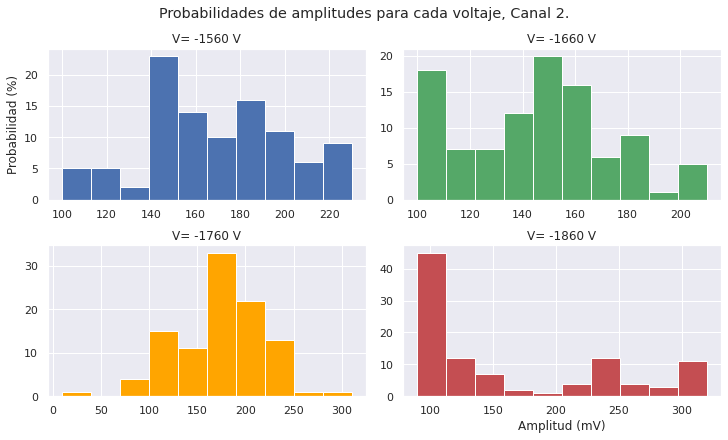

In [18]:
figure, axes = plt.subplots(2,2, figsize=(10,6),constrained_layout=True)

axes[0,0].hist(data2[0], 10, density=False, facecolor='b')
axes[0,0].set_ylabel('Probabilidad (%)')
axes[0,0].set_title('V= -1560 V')

axes[0,1].hist(data2[1], 10, density=False, facecolor='g')
axes[0,1].set_title('V= -1660 V')

axes[1,0].hist(data2[2], 10, density=False, facecolor='orange')
axes[1,0].set_title('V= -1760 V')

axes[1,1].hist(data2[3], 10, density=False, facecolor='r')
axes[1,1].set_title('V= -1860 V')

figure.suptitle('Probabilidades de amplitudes para cada voltaje, Canal 2.')
plt.xlabel('Amplitud (mV)')

plt.grid(1)
plt.show()

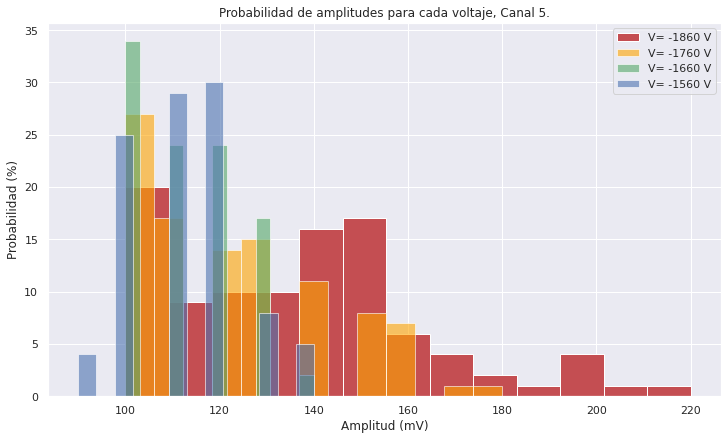

In [19]:
figure, axes = plt.subplots(1, figsize=(10,6),constrained_layout=True)

plt.hist(data5[3], 13, density=False, facecolor='r',alpha=1,label="V= -1860 V")
plt.hist(data5[2], 13, density=False, facecolor='orange',alpha=0.6,label="V= -1760 V")
plt.hist(data5[1], 13, density=False, facecolor='g',alpha=0.6,label="V= -1660 V")
plt.hist(data5[0], 13, density=False, facecolor='b',alpha=0.6,label="V= -1560 V")


plt.title('Probabilidad de amplitudes para cada voltaje, Canal 5.')
plt.ylabel('Probabilidad (%)')
plt.xlabel('Amplitud (mV)')
plt.legend(loc='upper right')
plt.grid(1)
plt.show()

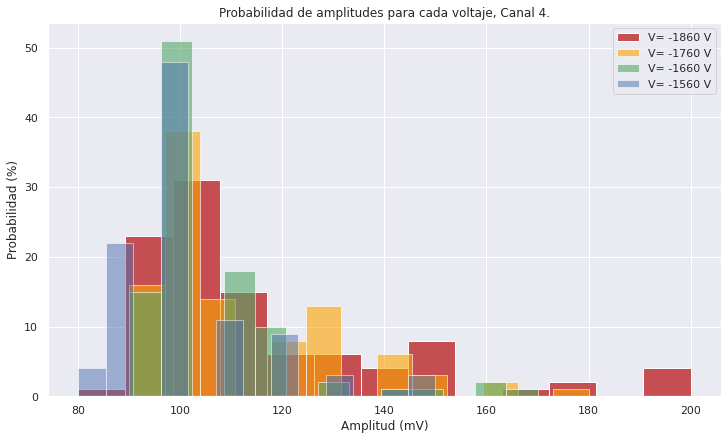

In [20]:
figure, axes = plt.subplots(1, figsize=(10,6),constrained_layout=True)

plt.hist(data4[3], 13, density=False, facecolor='r',alpha=1,label="V= -1860 V")
plt.hist(data4[2], 13, density=False, facecolor='orange',alpha=0.6,label="V= -1760 V")
plt.hist(data4[1], 13, density=False, facecolor='g',alpha=0.6,label="V= -1660 V")
plt.hist(data4[0], 13, density=False, facecolor='b',alpha=0.5,label="V= -1560 V")


plt.title('Probabilidad de amplitudes para cada voltaje, Canal 4.')
plt.ylabel('Probabilidad (%)')
plt.xlabel('Amplitud (mV)')
plt.legend(loc='upper right')
plt.grid(1)
plt.show()

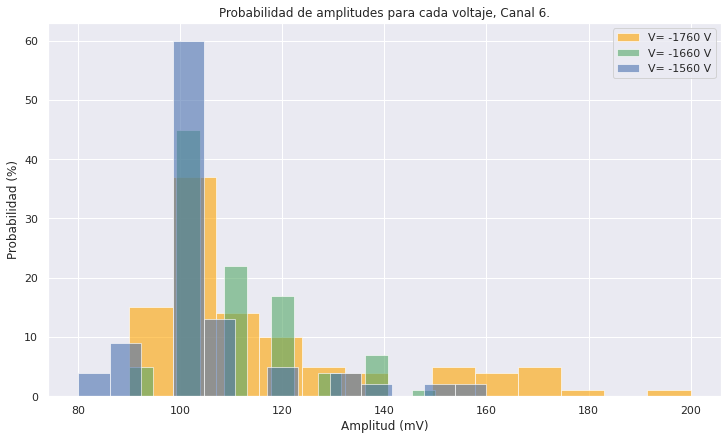

In [21]:
figure, axes = plt.subplots(1, figsize=(10,6),constrained_layout=True)

plt.hist(data6[2], 13, density=False, facecolor='orange',alpha=0.6,label="V= -1760 V")
plt.hist(data6[1], 13, density=False, facecolor='g',alpha=0.6,label="V= -1660 V")
plt.hist(data6[0], 13, density=False, facecolor='b',alpha=0.6,label="V= -1560 V")


plt.title('Probabilidad de amplitudes para cada voltaje, Canal 6.')
plt.ylabel('Probabilidad (%)')
plt.xlabel('Amplitud (mV)')
plt.legend(loc='upper right')
plt.grid(1)
plt.show()

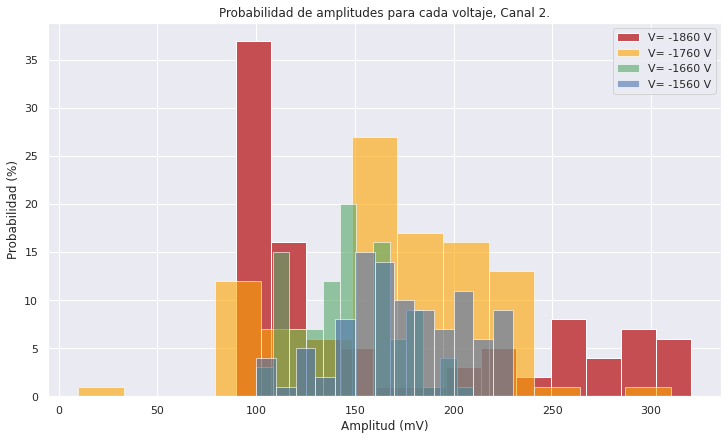

In [22]:
figure, axes = plt.subplots(1, figsize=(10,6),constrained_layout=True)

plt.hist(data2[3], 13, density=False, facecolor='r',alpha=1,label="V= -1860 V")
plt.hist(data2[2], 13, density=False, facecolor='orange',alpha=0.6,label="V= -1760 V")
plt.hist(data2[1], 13, density=False, facecolor='g',alpha=0.6,label="V= -1660 V")
plt.hist(data2[0], 13, density=False, facecolor='b',alpha=0.6,label="V= -1560 V")


plt.title('Probabilidad de amplitudes para cada voltaje, Canal 2.')
plt.ylabel('Probabilidad (%)')
plt.xlabel('Amplitud (mV)')
plt.legend(loc='upper right')
plt.grid(1)
plt.show()